# Exploratory Data Analysis (EDA) - Association Rule Mining for Cardiovascular Comorbidity and Risk Factor Assessment



### Import Libraries and Load Dataset

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Input dataset from Kaggle

df = pd.read_csv(r'C:\Users\Admin\Documents\dataset_association_mining\heart_2020_cleaned.csv')

print(df.head())
print(df.shape)


  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

### Overview of Original Dataset

In [8]:
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Visualisation of Raw Dataset

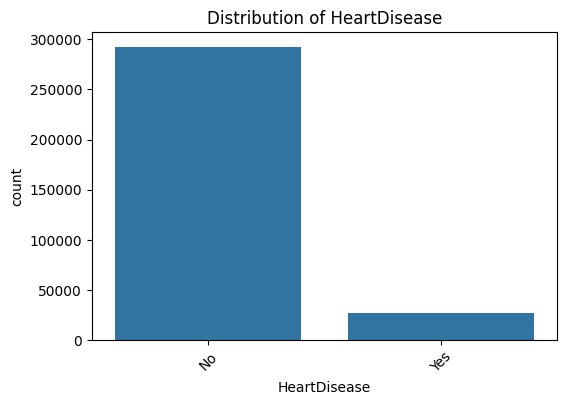

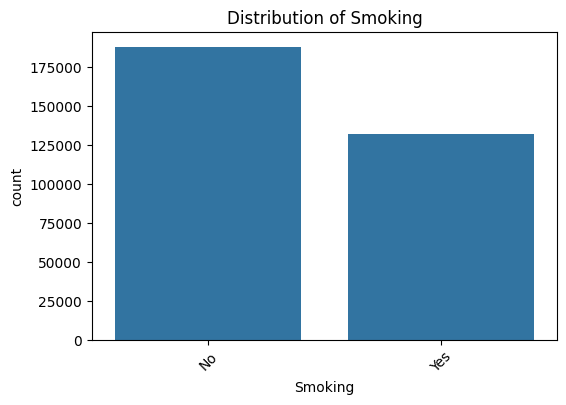

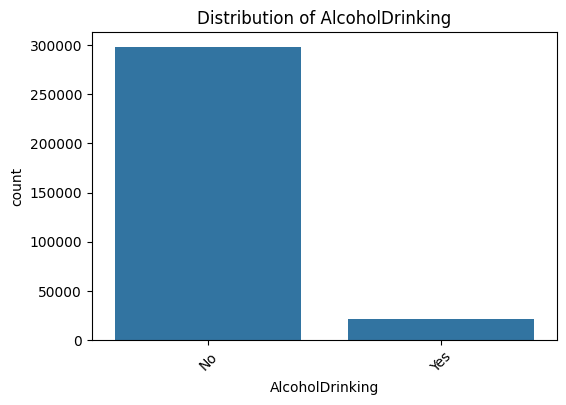

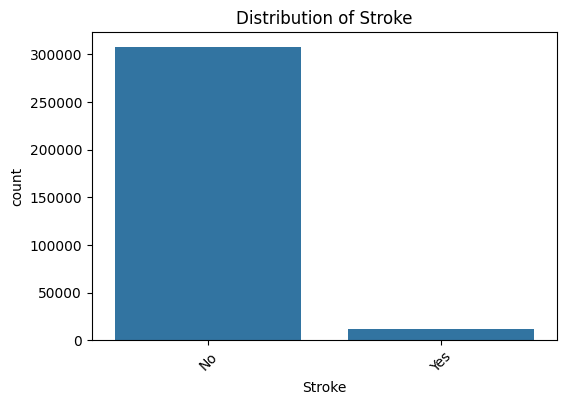

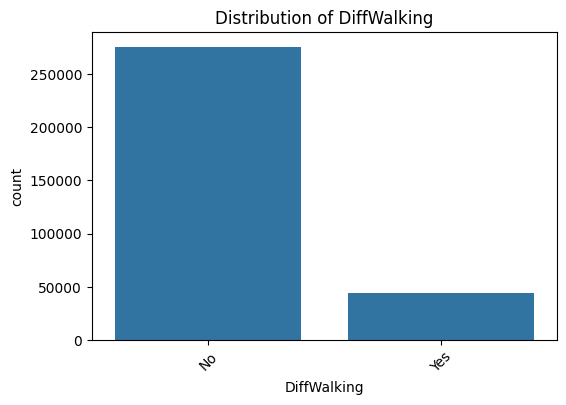

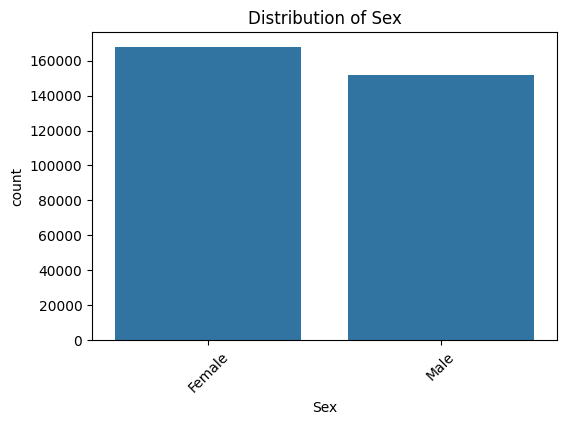

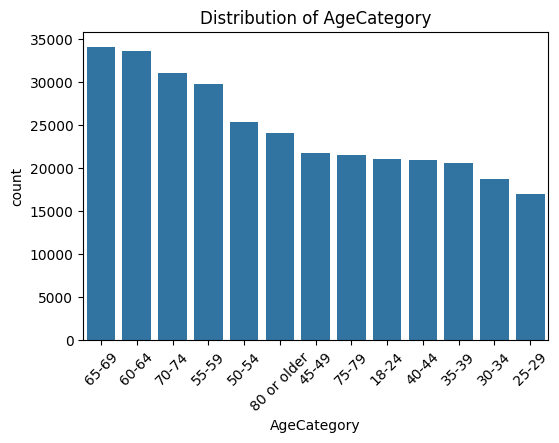

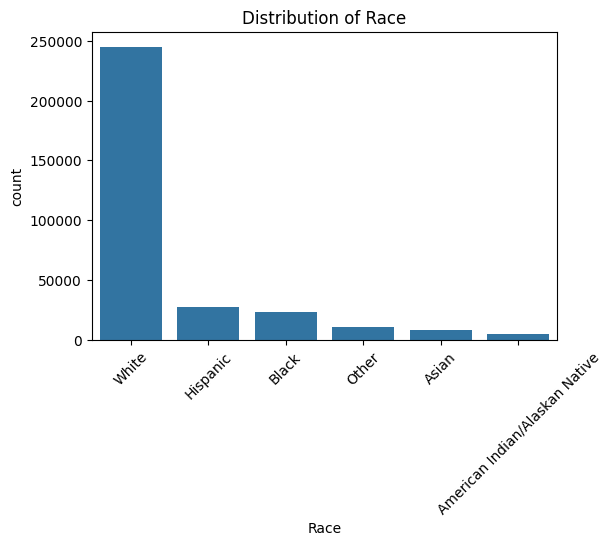

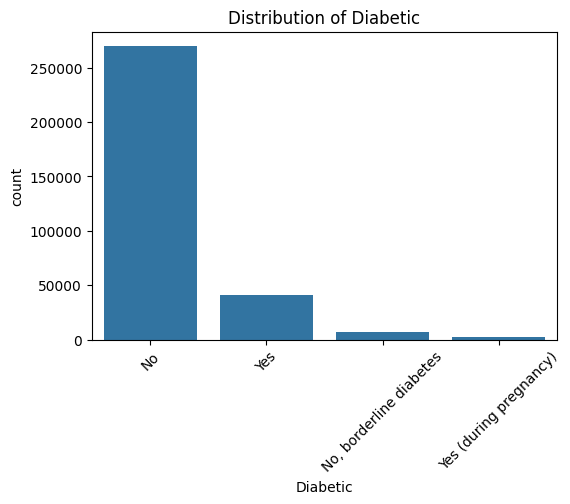

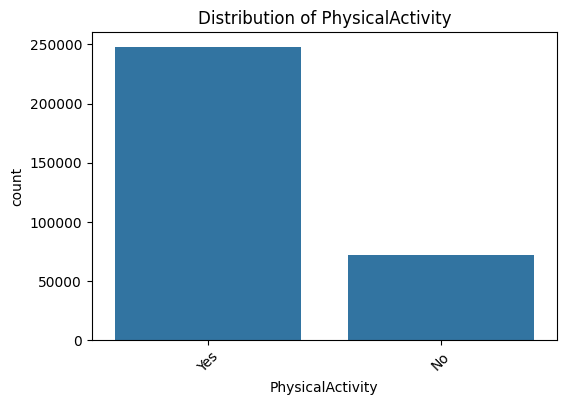

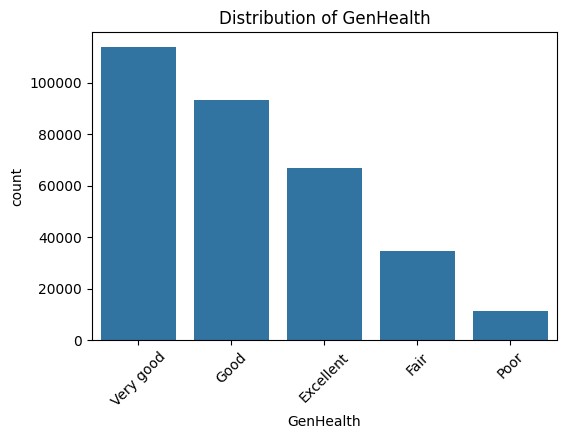

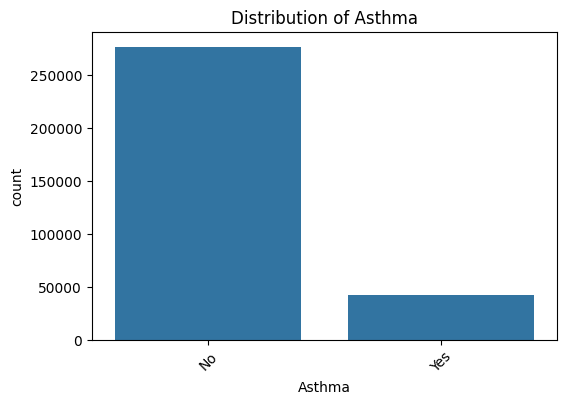

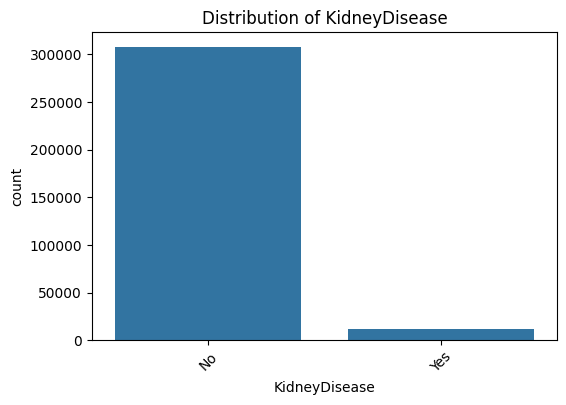

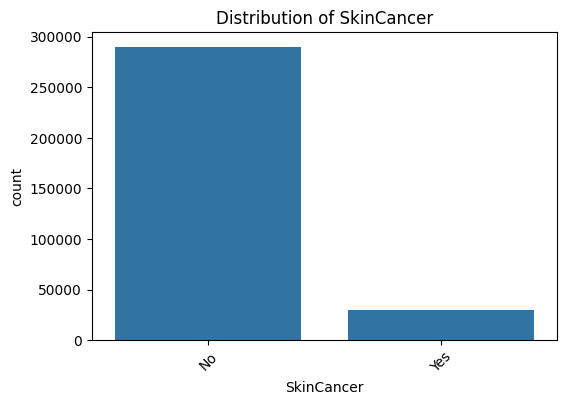

In [9]:
# Bar chart for categorical columns
# Shows frequency distribution of each categorical variable

categorical_cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 
                    'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 
                    'Asthma', 'KidneyDisease', 'SkinCancer']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

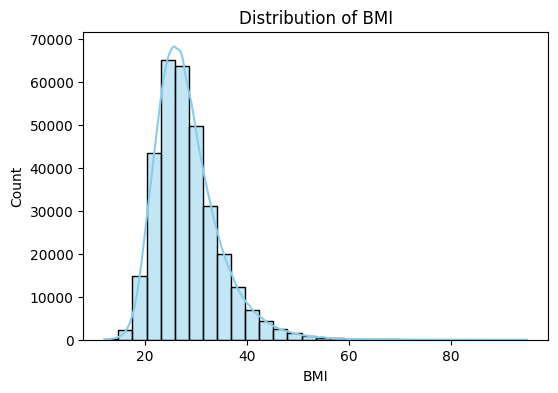

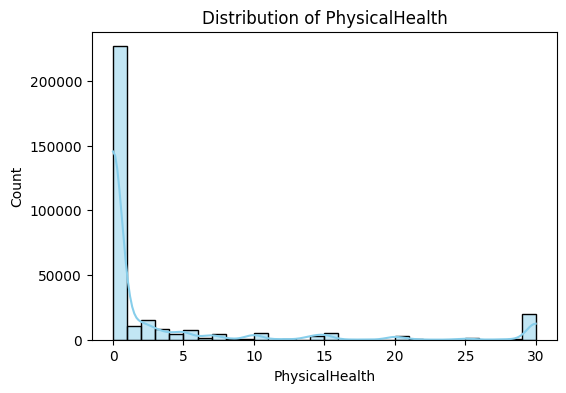

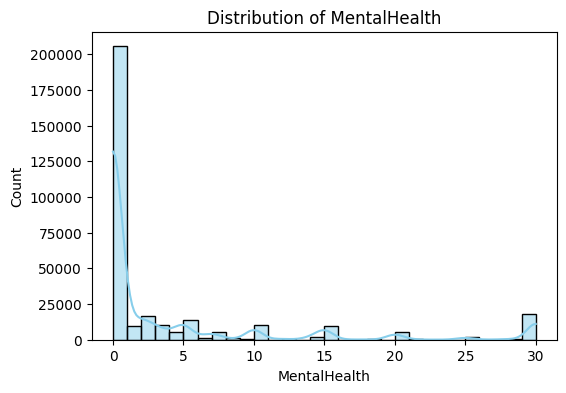

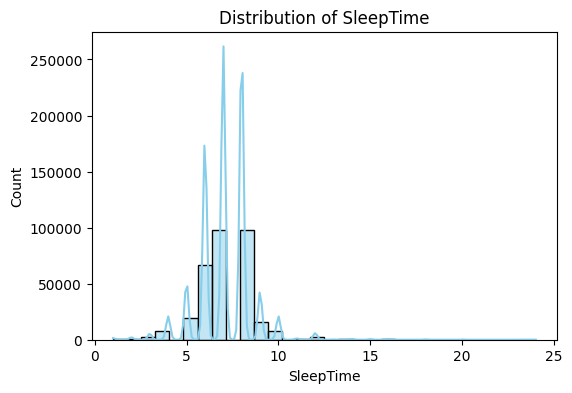

In [10]:
# Histogram for continuous columns

continuous_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

for col in continuous_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()

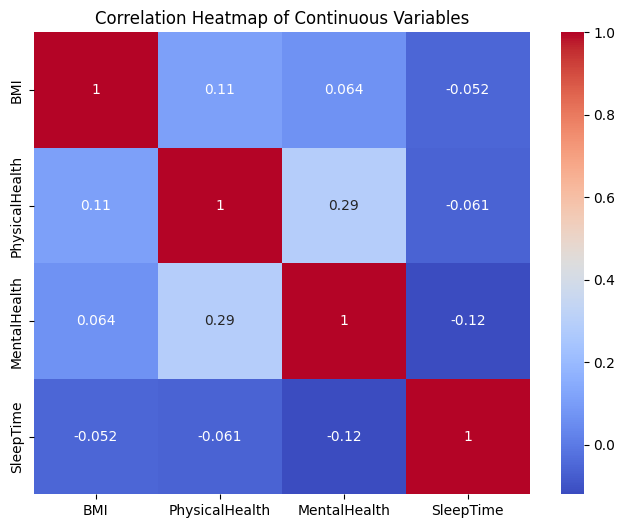

In [11]:
# Correlation heatmap for numeric columns

plt.figure(figsize=(8, 6))
sns.heatmap(df[continuous_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

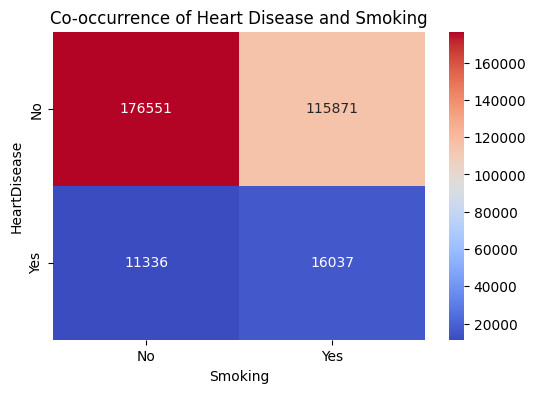

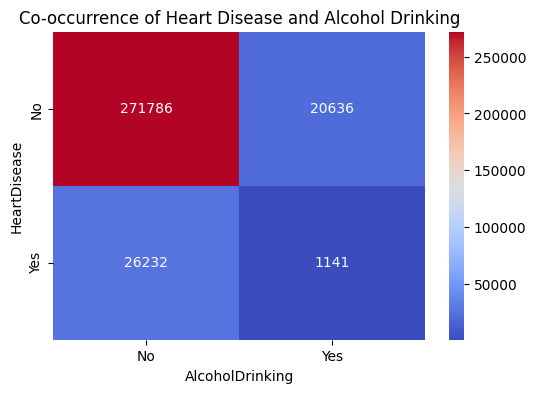

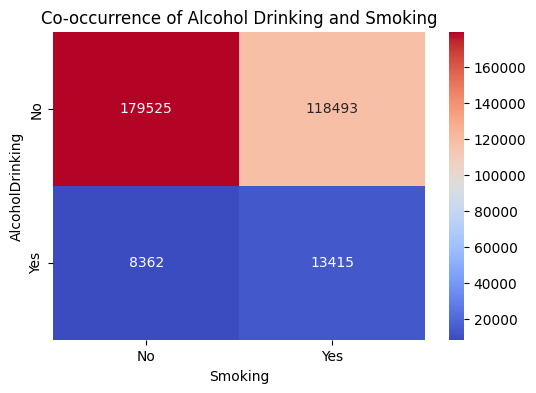

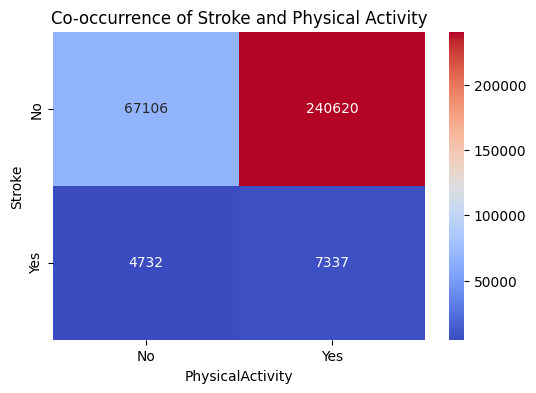

In [12]:
# Co-occurrence matrix for categorical columns

# HeartDisease vs Smoking
cross_tab = pd.crosstab(df['HeartDisease'], df['Smoking'])
plt.figure(figsize=(6, 4))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm')
plt.title('Co-occurrence of Heart Disease and Smoking')
plt.show()

# HeartDisease vs AlcoholDrinking
cross_tab = pd.crosstab(df['HeartDisease'], df['AlcoholDrinking'])
plt.figure(figsize=(6, 4))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm')
plt.title('Co-occurrence of Heart Disease and Alcohol Drinking')
plt.show()

# AlcoholDrinking vs Smoking
cross_tab = pd.crosstab(df['AlcoholDrinking'], df['Smoking'])
plt.figure(figsize=(6, 4))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm')
plt.title('Co-occurrence of Alcohol Drinking and Smoking')
plt.show()

# Stroke vs PhysicalActivity
cross_tab = pd.crosstab(df['Stroke'], df['PhysicalActivity'])
plt.figure(figsize=(6, 4))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm')
plt.title('Co-occurrence of Stroke and Physical Activity')
plt.show()


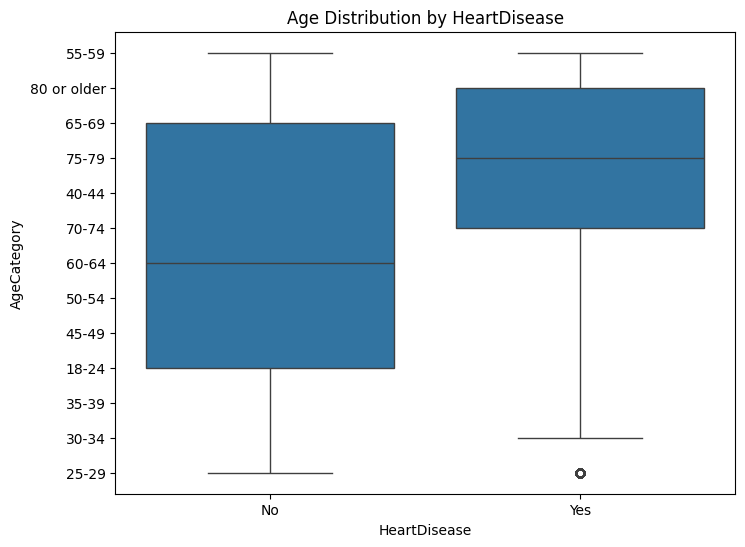

In [13]:
# Age distribution by Heart Disease status 
# to see differences in age between disease and non-disease groups

plt.figure(figsize=(8,6))
sns.boxplot(x='HeartDisease', y='AgeCategory', data=df)
plt.title('Age Distribution by HeartDisease')
plt.show()

### Load Preprocessed Dataset

In [14]:
df_preprocessed = pd.read_csv(r'C:\Users\Admin\Documents\dataset_association_mining\heart_disease_preprocessed.csv')

print(df_preprocessed.head())
print(df_preprocessed.shape)

   HeartDisease_No  HeartDisease_Yes  BMI_cat_Underweight  BMI_cat_Normal  \
0             True             False                 True           False   
1             True             False                False            True   
2             True             False                False           False   
3             True             False                False            True   
4             True             False                False            True   

   BMI_cat_Overweight  BMI_cat_Obese  Smoking_No  Smoking_Yes  \
0               False          False       False         True   
1               False          False        True        False   
2                True          False       False         True   
3               False          False        True        False   
4               False          False        True        False   

   AlcoholDrinking_No  AlcoholDrinking_Yes  ...  GenHealth_Very good  \
0                True                False  ...                 True   
1 

### Visualisation of Preprocessed Dataset

C:\Users\Admin\AppData\Local\Temp\ipykernel_3432\637608666.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_counts.index, y=feature_counts.values, palette="viridis")


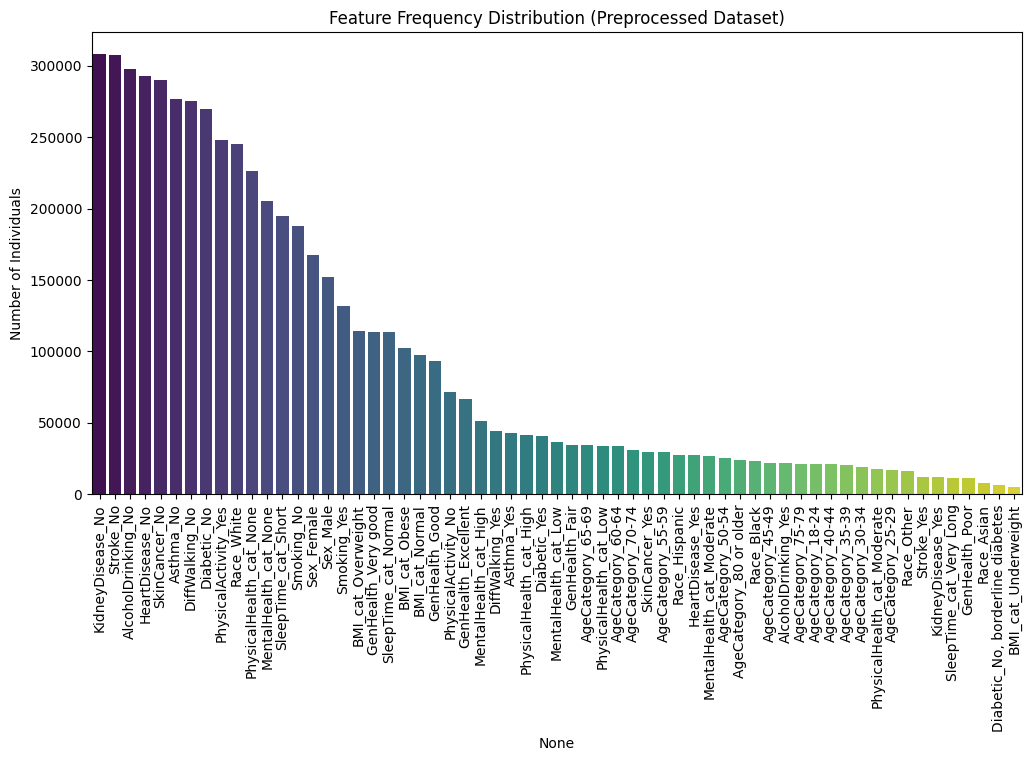

In [15]:
# Sum each column to get frequency
feature_counts = df_preprocessed.sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=feature_counts.index, y=feature_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.ylabel("Number of Individuals")
plt.title("Feature Frequency Distribution (Preprocessed Dataset)")
plt.show()


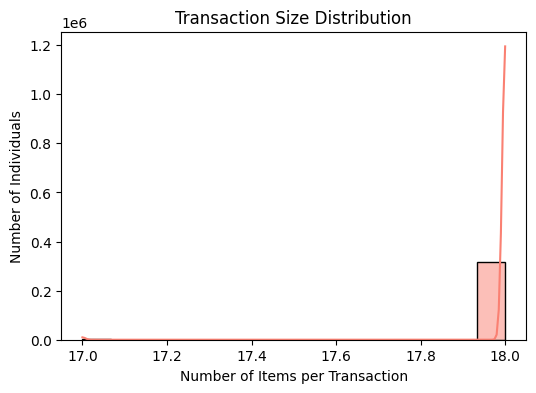

In [16]:
# Count of items per transaction

df_preprocessed['transaction_size'] = df_preprocessed.sum(axis=1)

plt.figure(figsize=(6,4))
sns.histplot(df_preprocessed['transaction_size'], bins=15, color='salmon', kde=True)
plt.xlabel("Number of Items per Transaction")
plt.ylabel("Number of Individuals")
plt.title("Transaction Size Distribution")
plt.show()

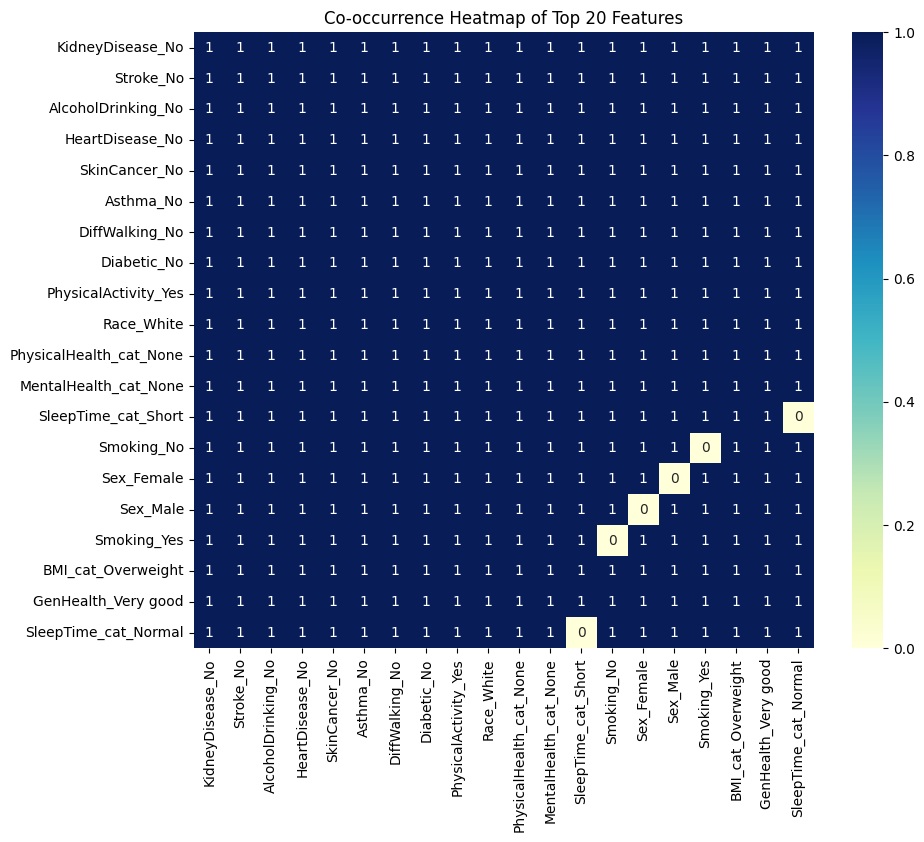

In [17]:
# Co-occurrence matrix for features that appear together frequently

top_features = feature_counts.head(20).index.tolist()
co_occurrence = df_preprocessed[top_features].T.dot(df_preprocessed[top_features])

plt.figure(figsize=(10,8))
sns.heatmap(co_occurrence, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Co-occurrence Heatmap of Top 20 Features")
plt.show()
